## 4.1 선형 회귀

- 삶의 만족도 = image.png

- 선형 모델은 입력 특성의 가중치 합과 편향 (또는 절편)이라는 상수를 더해 예측을 만듬

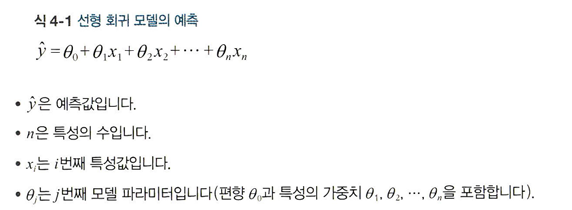

- 벡터 형식

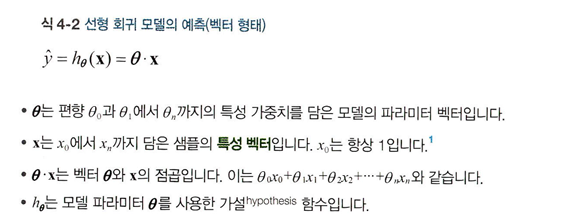

## 4.1.1 정규방정식

- 비용 함수를 최소화하는 값을 찾기 위한 수학공식을 정규방정식이라고 함.
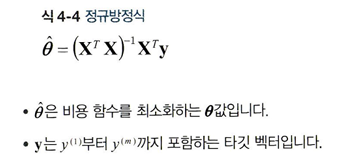


In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

In [4]:
# 정규방정식을 위한 θ 계산

X_b = np.c_[np.ones((100,1)), X]  # 모든 샘플에 x0 = 1 추가합니다.
# 넘파이 선형대수 모듈(np.linalg)에 있는 inv()함수를 사용해 역행렬 계산
# dot() 메서드를 사용해 행렬 곱셈
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
# 사용 함수 y = 4 + 3x1 + 가우시안_잡음
# 정규방정식으로 계산
theta_best

array([[4.26089852],
       [2.79728558]])

In [6]:
# θ 사용해 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0 =1 을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.26089852],
       [9.85546967]])

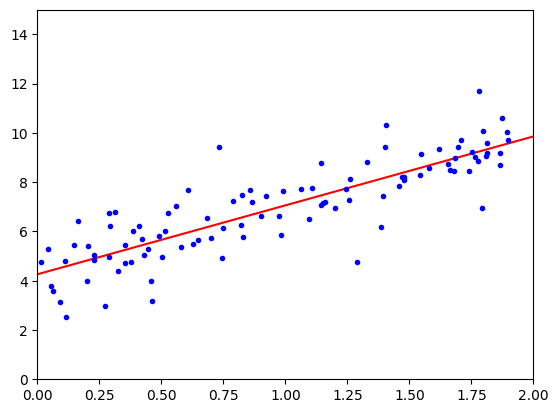

In [7]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([4.26089852]), array([[2.79728558]]))

In [10]:
lin_reg.predict(X_new)

array([[4.26089852],
       [9.85546967]])

In [11]:
# scipy.linalg.lstsq() 함수를 이용(최소제곱법)
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.26089852],
       [2.79728558]])

In [12]:
# 유사역행렬 계산
import numpy as np
np.linalg.pinv(X_b).dot(y)

array([[4.26089852],
       [2.79728558]])

-> 유사역행렬은 특잇값 분해(SVD)라 부르는 표준행렬분해 기법을 이용해 계산

(1) SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셈 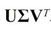로 분해

  (2) 알고리즘이 먼저 합을 구하고 그다음 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꿈

  (3) 그 다음 0이 아닌 모든 값을 역수로 치환

  (4) 행렬을 전치

-> m < n이거나 어떤 특성이 중복되어 행렬 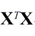의 역행렬이 없다면(즉, 특이 행렬이라면) 정규방정식이 작동하지 않지만, 유사역행렬은 항상 구할 수 있음.




## 4.1.2 계산 복잡도

- 정규 방정식은 (n+1) * (n+2) 크기가 되는 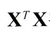의 역행렬을 계산

- 역행렬을 계산하는 계산 복잡도는 일반적으로 O(n^2.4)에서 O(n^3) 사이임, 즉 특성 수가 두 배로 늘어나면 계산 시간이 대략 2^2.4=5.3에서 2^3 = 8배로 증가

## 4.2 경사하강법

- 경사하강법(GD)는 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 기본 아이디어는 비용 함수를 최소화하기 위해서 반복해서 파라미터를 조정
- 파라미터 벡터 θ에 대해 비용 함수의 현재 그레이디언트를 계산, 그레이디언트 감소하는 방향으로 진행, 그레이디언트가 0이 되면 최솟값에 도달
- θ를 임의의 값으로 시작해서(무작위 초기화) 한번에 조금씩 비용 함수(MSE)가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상


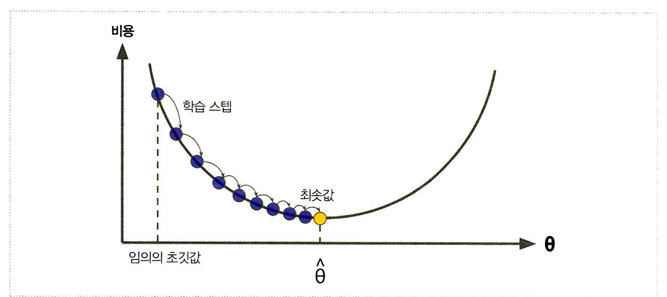

- 경사 하상법에서 중요한 파라미터는 스텝의 크기로, 학습률 하이퍼파라미터로 결정됨.
- 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림.

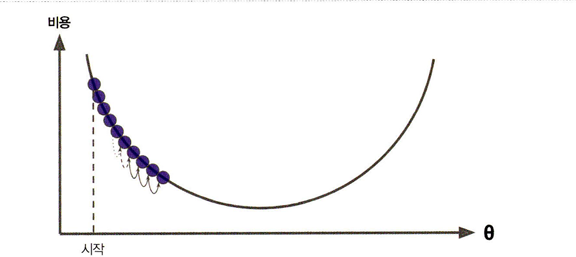

- 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 될지도 모름
-> 이는 알고리즘을 더 큰 값으로 적절한 해법을 찾지 못하게 함.

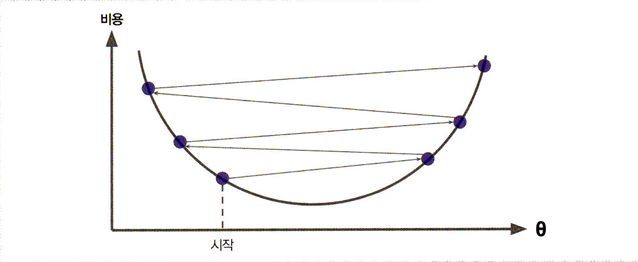

- 경사 하강법의 문제점
1) 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴
2) 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 최솟값에 도달하지 못함

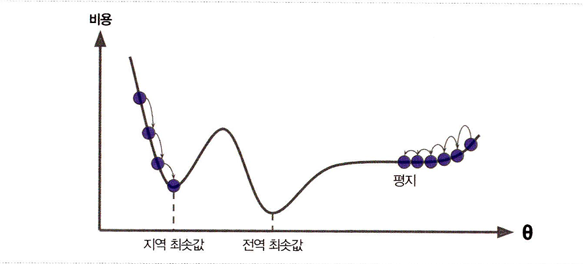

- 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수임.
- 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 의미로 연속된 함수이고 기울기가 갑자기 변하지 않음.
- 경사 하강법은 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장
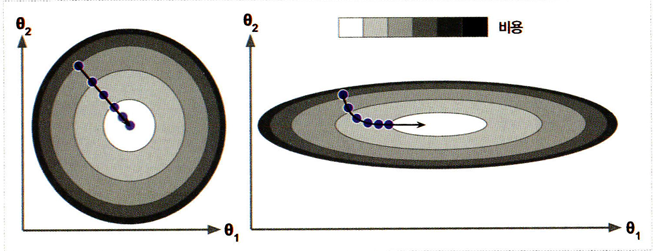

- 왼쪽의 경사하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달하는 반면, 오른쪽 그래프는 처음엔 전역 최솟값의 방향에 거의 직각으로 향하다가 평편한 골짜기를 길게 돌아서 나감. 결국 최솟값에 도달하겠지만 시간이 오래 걸림.

- 모델 훈련이 비용함수를 최소화하는 모델 파라미터 조합을 찾는 일로 이를 모델의 파라미터 공간에서 찾는 것을 의미

## 4.2.1 배치 경사 하강법
- 경사하강법을 구현하기 위해서는 각 모델 파라미터 θj에 대해 비용 함수의 그레이디언트를 계산해야 함. θj가 조금 변경될 떄 비용 함수가 얼마나 바뀌는지 계산해야 하고 이를 편도함수라고 함.

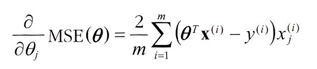

- 편도함수를 각각 계산하는 대신 식을 사용해 한꺼번에 계산 가능

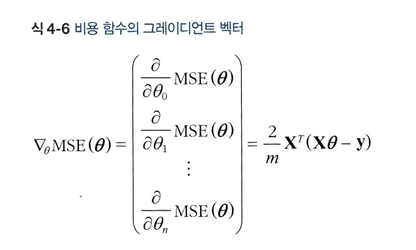

- 위로 향하는 그레이디언트 벡터가 구해지면 반대 방향인 아래로 가야하며,  θ에서 MSE(θ)를 빼야하며 여기서 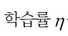가 사용되어 내려가는 스텝의 크기를 결정하기 위해 그레이디언트 벡터에 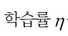을 곱함.
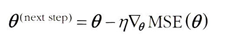


In [14]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[4.26089852],
       [2.79728558]])

- 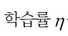을 바꾸고 세가지 다른 학습률을 사용해 진행한 경사 하강법

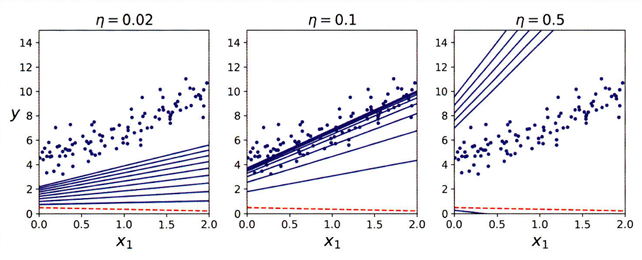

- 왼쪽은 학습률이 너무 낮아 알고리즘은 최적점에 도달하겠지만 시간이 올래 걸릴것임.
- 가운데는 학습률이 적당해 반복 몇번만에 이미 최적점에 수렴.
- 오른쪽은 학습률이 너무 높아 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산.


- 적절한 학습률을 찾으려면 그리드 탐색을 사용해야 하지만, 그리드 탐색에서 수렴하는데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 함.
- 반복 횟수 또한 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈추며 너무 크면 모델 파라미터가 더는 변하지 않는동안 시간을 낭비하게 됨.
-> 반복회수를 아주 크기 지정하고 그레이디언트 벡터가 아주 작아지면, 벡터의 노름이 어떤 값 image.png보다 작아지면 경사 하강법이 최솟값에 도달한 것이므로 알고리즘을 중지

## 4.2.2 확률적 경사 하강법

1. 배치 경사하강법
  - 배치 경사하강법의 문제점은 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산해야 하며 훈련 세트가 커지면 매우 느려지게 됨.

2. 확률적 경사하강법
  - 확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산, 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한번에 하나의 샘플을 처리하면 알고리즘이 빠름.
  - 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련가능 (SGD는 외부 메모리 학습 알고리즘으로 구현할 수 있음)
  - 반면, 무작위이므로 배치경사 하강법보다 훨씬 불안정하며 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지않고 위아래로 요동치면서 평균적으로 감소함.
  - 최솟값에 매우 근접하겠지만, 요동이 지속되면서 최솟값에 안착하지 못할 것임. 알고리즘이 멈출 때 좋은 파라미터가 구해질 수 있지만, 최적지가 아님.


- 무작위성은 지역 최소값에서 탈출시켜주미나 알고리즘을 전역 최솟값에 다다르지 못하게 함.
-> 학습률을 점진적으로 감소시켜야 함.(담금질 기법: 시작할 때는 학습률을 크게하고 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게함.)

- 매 반복에서 학습률을 결정하는 함수를 학습 스케줄이라고 부르며 학습률이 천천히 줄어들어 최솟값에 머무르게 해야함.

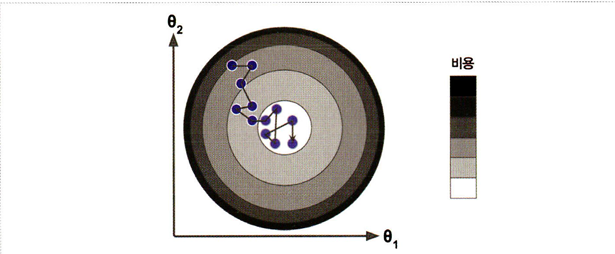

In [17]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터
def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index + 1]
    yi = y[random_index: random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

# 한 반복에서 m번 되풀이되고 이 반복을 에포크라고 함.

In [18]:
theta

array([[4.29316078],
       [2.72206024]])

- 훈련 스텝의 첫 20 개를 보여줌(스텝이 불규칙하게 진행)
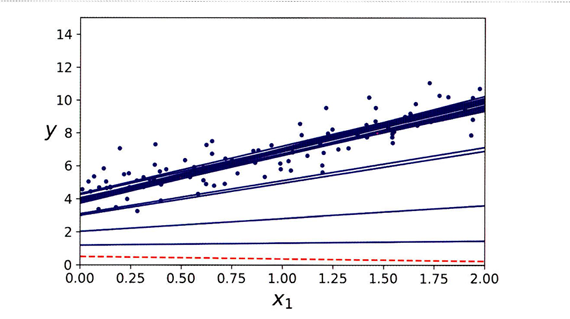

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.13458746]), array([2.69087414]))

## 4.2.3 미니배치 경사 하강법

- 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대한 그레이디언트를 계산
- 행렬 연산에 최적화된 하드웨어로 특히 GPU를 사용해 성능 향상을 할 수 있음.

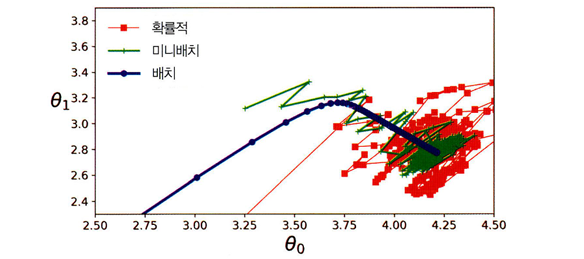


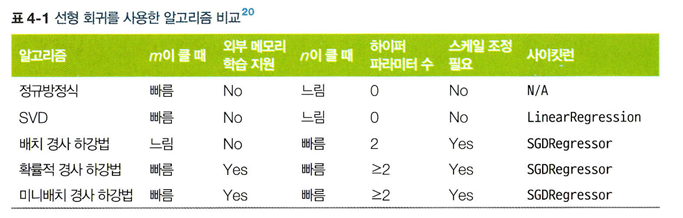

## 4.3 다항 회귀



In [24]:
m=100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

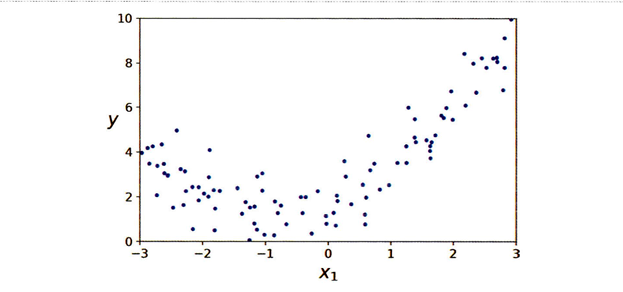

In [25]:
# 사이킷런의 PolynomialFeatures를 사용해 훈련 데이터 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.08820903])

In [26]:
X_poly[0]

array([-1.08820903,  1.18419889])

In [27]:
# 훈련 데이터에 linear regression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.21361407]), array([[1.02484229, 0.49830848]]))

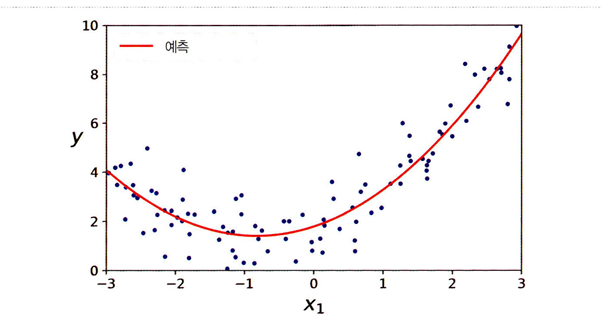

- 실제 원래 함수 y = 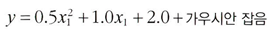

- 예측된 모델: 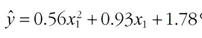



## 4.4 학습 곡선

- 고차 다항회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것임.

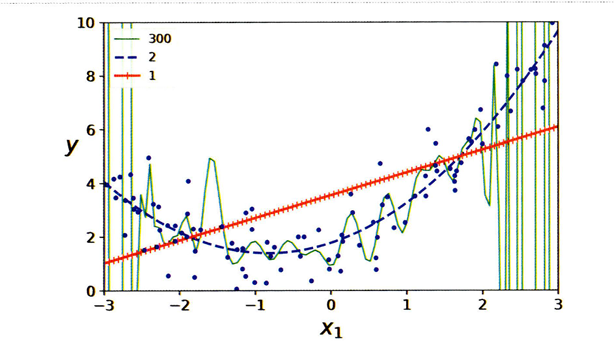

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+', linewidth=2, label='훈련 세트')
  plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label='검정 세트')

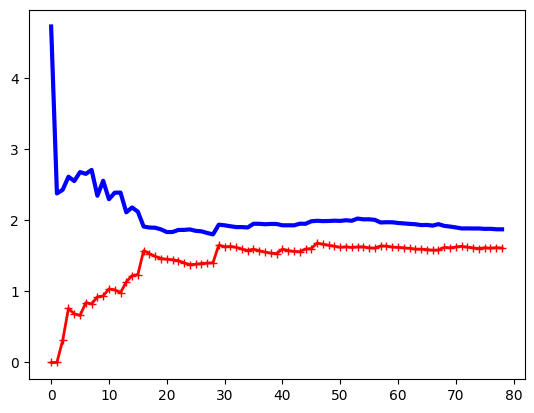

In [30]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

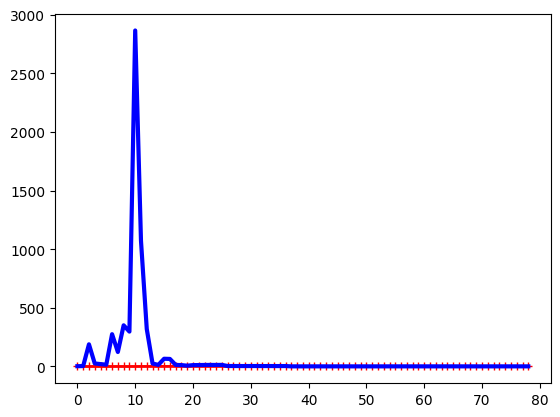

In [31]:
# 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

- 이전 곡선과의 차이점
  - 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
  - 두 곡선 사이에 공산이 있음. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징임. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐.

  - 편향/ 분산 트레이드 오프
    - 편향: 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것으로 데이터가 실제로는 2차인데 선형으로 가정하는 경우로 편향이 큰 모델은 훈련 데이터에 과소적합하기 쉬움.
    - 분산: 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 떄문에 나타나서 자유도가 높은 모델(예를 들어 고차 다항 회귀 모델)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있음.
    - 줄일 수 없는 오차: 데이터 자체에 있는 잡음 떄문에 발생, 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을 제거하는 것임.

    -> 통상적으로 모델의 복잡도가 커짐녀 분산이 늘어나고 편향이 줄어듬, 반면, 모델의 복잡도가 줄어들면 편향이 커지고 분산은 작아져 이를 트레이드오프라고 부름.

## 4.5 규제가 있는 선형 회귀 모델

- 선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가해 가중치를 제한하는 '릿지'회귀, '라쏘'회귀, 엘라스틱넷이 있음


## 4.5.1 릿지 회귀
- 규제항 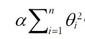이 비용 함수에 추가되어 학습 알고리즘을 데이터에 맞추는 것 뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 노력

- 규제항은 훈련하는 동안에만 비용함수에 추가되어 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가